In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
data = pd.read_csv("/content/movies_youtube_sentiments.csv")

# Data Preprocessing
# Convert categorical variables into numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['genre', 'country'])

# Drop irrelevant columns
data.drop(['name', 'trailer_link', 'video_id', 'director', 'writer', 'star', 'released', 'company', 'gross'], axis=1, inplace=True)

# Handle missing values if any
data.fillna(0, inplace=True)  # Filling missing values with zeros, you might want to use a more appropriate strategy

# Split data into features and target variable
X = data.drop(['sentiment_scores', 'favorability', 'rating'], axis=1)
y = data['favorability']  # or 'rating' if you're doing regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



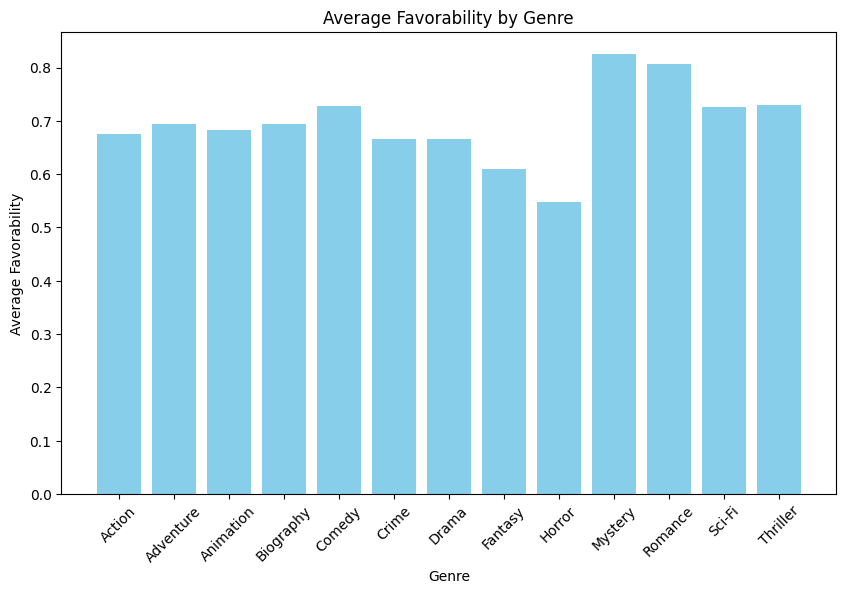

In [24]:
# Plotting average favorability by genre
genre_columns = [col for col in data.columns if col.startswith('genre_')]
genre_favorability = {}
for col in genre_columns:
    genre = col.split('_')[-1]
    genre_favorability[genre] = data[data[col] == 1]['favorability'].mean()

plt.figure(figsize=(10, 6))
plt.bar(genre_favorability.keys(), genre_favorability.values(), color='skyblue')
plt.title('Average Favorability by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Favorability')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Initialize and train the model (Random Forest Regressor in this example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Now, let's make predictions for user-given data
def make_prediction(year, votes, budget, runtime, genre, country):
    # Create a DataFrame from user input
    user_input = pd.DataFrame({
        'year': [year],
        'votes': [votes],
        'budget': [budget],
        'runtime': [runtime],
        # Add more features according to your model
        'genre': [genre],      # Assuming genre is a string, you need to one-hot encode it
        'country': [country]   # Assuming country is a string, you need to one-hot encode it
    })

    # Perform one-hot encoding for genre and country
    user_input = pd.get_dummies(user_input, columns=['genre', 'country'])

    # Ensure all columns present in user input are present in the model features
    user_input = user_input.reindex(columns=X.columns, fill_value=0)

    # Make prediction for user input
    prediction = model.predict(user_input)

    return prediction

# Example usage
print("\nOutput of the model for the test data:")
print(predictions)


Mean Absolute Error: 0.10237148387560059

Output of the model for the test data:
[0.67922956 0.63710098 0.71773076 0.73409048 0.71396237 0.68158966
 0.66368023 0.66208218 0.76287307 0.84182133 0.67299754 0.6734048
 0.70475307 0.53742383 0.6396381  0.6323064  0.69139158 0.72654473
 0.58256535 0.69170073 0.62880131 0.67809867 0.66850122 0.71937054
 0.68068188 0.6362724  0.82435667 0.71217424 0.69233605 0.65360668
 0.67446805 0.68595719 0.64257958 0.71396787 0.64341922 0.66577608
 0.753959   0.71859149 0.71250077 0.8222035  0.46534244 0.71230358
 0.67209615 0.67108872 0.69759734 0.63724217 0.68318686 0.65217888
 0.71530288 0.69704551 0.65249605 0.72283328 0.68997522 0.71832319
 0.70066477 0.67287591 0.71746804 0.63508114 0.70030518 0.65067975
 0.7073177  0.65775989 0.68200928 0.72675716 0.55602477 0.70939431
 0.62480776 0.65249552 0.62363275 0.63783741 0.66897458 0.62388204
 0.73141371 0.57136116 0.72046549 0.6453916  0.66765312 0.68493858
 0.703821   0.58945731 0.68283034 0.67546436 0.66

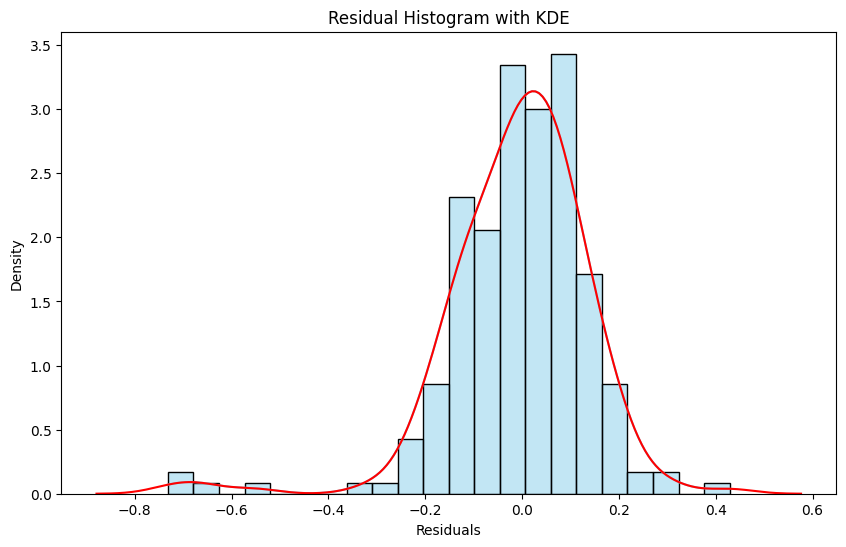

In [26]:
# Calculate residuals
residuals = y_test - predictions

# Residual Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', stat='density')
sns.kdeplot(residuals, color='red')
plt.title('Residual Histogram with KDE')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()




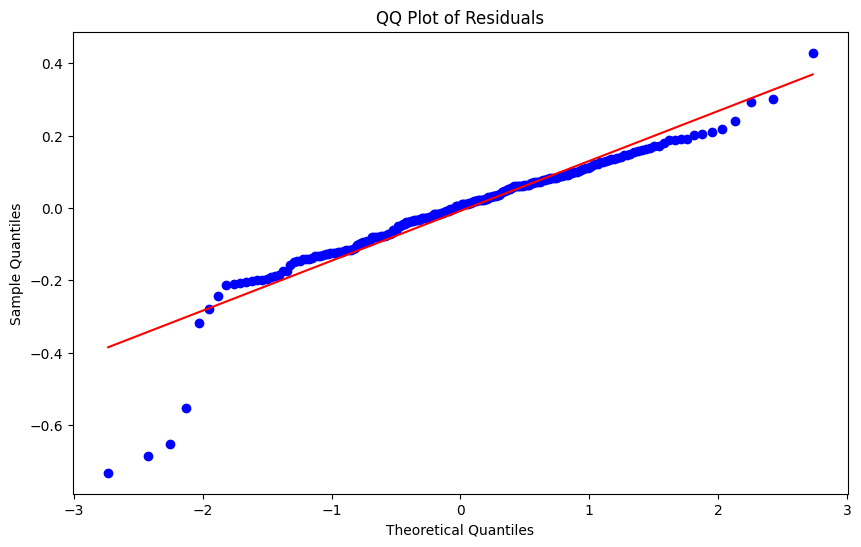

In [27]:
# QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()